In [20]:
%matplotlib inline
import numpy as np
from numpy import random
import tensorflow as tf

# fix random seed for reproducibility
#seed = 7
#np.random.seed(seed)
#####################################
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
#####################################

import matplotlib
from matplotlib import pyplot as plt
import cv2
import base64
import os
from PIL import Image
import matplotlib.image as mpimg
import os

from keras.models import *
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.feature_extraction.image import extract_patches_2d

from keras import backend as K


In [21]:
#produce binary masks for training, resize all the masks to 500X500 
def Label_to_BinLabel(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #print(img.shape)
        #cv2.imwrite(source+str(j)+'.png', thresh)#final mask
        #img4 = cv2.imread(source+str(j)+'.png')
        img4 = cv2.resize(img,(500, 500))
        ret,thresh = cv2.threshold(img4,0,255,cv2.THRESH_BINARY)
        print(thresh)
        print(thresh.shape)
        print('_'*40)
        cv2.imwrite("/home/hp/data/Train/label1/%d.png"%(j),thresh)
        

In [22]:
list = os.listdir('/home/hp/data/Train/label') # dir is your directory path
number_files = len(list)
print (number_files)

Label_to_BinLabel('/home/hp/data/Train/label/', number_files)

24
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
(500, 500)
________________________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(500, 500)
________________________________________
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]
(500, 500)
________________________________________
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
(500, 500)
________________________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 

In [23]:
#resize all of 24 train images to 500X500
def Resize_images(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')        
        img = cv2.resize(img,(500, 500))
        print(img)
        print(img.shape)
        cv2.imwrite("/home/hp/data/Train/image1/%d.png"%(j),img)

In [24]:
list = os.listdir('/home/hp/data/Train/image') # dir is your directory path
number_files = len(list)
print (number_files)

Resize_images('/home/hp/data/Train/image/', number_files)

24
[[[226 194 220]
  [236 185 214]
  [247 177 207]
  ...
  [214 169 194]
  [199 175 199]
  [222 188 217]]

 [[228 189 215]
  [236 181 209]
  [246 173 203]
  ...
  [230 173 200]
  [220 183 212]
  [244 194 229]]

 [[232 185 211]
  [238 177 205]
  [245 170 200]
  ...
  [244 176 206]
  [244 191 224]
  [255 201 239]]

 ...

 [[222 175 251]
  [221 172 250]
  [225 176 247]
  ...
  [190  77 108]
  [177  72  98]
  [161  68  87]]

 [[233 163 206]
  [226 158 194]
  [225 161 189]
  ...
  [185  78 116]
  [176  69 101]
  [160  66  88]]

 [[244 138 197]
  [235 138 194]
  [229 146 196]
  ...
  [169  89 105]
  [133  82  88]
  [147  72  84]]]
(500, 500, 3)
[[[239 236 243]
  [239 236 243]
  [239 236 243]
  ...
  [243 224 230]
  [243 232 233]
  [243 242 238]]

 [[239 236 243]
  [239 236 243]
  [239 236 243]
  ...
  [243 228 234]
  [243 236 236]
  [243 244 240]]

 [[239 236 243]
  [239 236 243]
  [239 236 243]
  ...
  [243 235 239]
  [243 241 241]
  [243 247 244]]

 ...

 [[ 40  33 145]
  [ 42  40 131]
  [

[[[163 120 185]
  [158 120 183]
  [153 120 183]
  ...
  [101  46  79]
  [113  65 108]
  [136  93 148]]

 [[169 121 181]
  [165 121 180]
  [161 121 179]
  ...
  [ 94  42  76]
  [109  61 107]
  [132  88 147]]

 [[173 124 185]
  [172 124 183]
  [169 124 183]
  ...
  [ 92  43  78]
  [103  56 105]
  [118  73 136]]

 ...

 [[221 199 215]
  [217 195 216]
  [206 175 215]
  ...
  [148  99 161]
  [150  98 160]
  [152 103 173]]

 [[219 196 210]
  [212 186 211]
  [206 166 213]
  ...
  [154 107 177]
  [154 106 174]
  [152 104 169]]

 [[217 197 214]
  [209 183 211]
  [203 161 207]
  ...
  [153 120 179]
  [151 111 172]
  [150 101 165]]]
(500, 500, 3)
[[[220 209 250]
  [200 182 240]
  [179 138 196]
  ...
  [134  78 134]
  [132  87 140]
  [127  75 115]]

 [[212 187 239]
  [182 145 218]
  [156 102 168]
  ...
  [132  77 141]
  [129  81 136]
  [124  66 104]]

 [[203 161 220]
  [173 116 184]
  [149  83 145]
  ...
  [137  74 144]
  [133  74 137]
  [128  56 103]]

 ...

 [[172 120 209]
  [164 107 205]
  [161

In [25]:
#Extracting 5 patches of size 256X256 from each image

path = '/home/hp/data/Train/image1/'
path1 = '/home/hp/data/Train/label1/'
list = os.listdir('/home/hp/data/Train/image1') # dir is your directory path
size = len(list)
print (size)

patch_size = (256, 256)

k=1
for i in range(1, size+1):
    img = cv2.imread(path+str(i)+'.png')
    img1 = cv2.imread(path1+str(i)+'.png')
    data = extract_patches_2d(img, patch_size, max_patches=5,random_state=1)
    data1 = extract_patches_2d(img1, patch_size, max_patches=5,random_state=1)
    print(data.shape)
    print(data1.shape)
    data = np.array(data) 
    data1 = np.array(data1) 
    print(data.shape)
    print(data1.shape)
    print('-'*30)
    #print(data.shape)
    #print(data1.shape)
    for j in range(data.shape[0]):
        img = data[j]
        img1 = data1[j]
        img = array_to_img(img)
        img1 = array_to_img(img1)
        img.save("/home/hp/patch_image/%d.png"%(k))
        img1.save("/home/hp/patch_label/%d.png"%(k))
        k = k+1

24
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256

In [26]:
#augmentation

batch_size = 16

datagen = ImageDataGenerator(
        rotation_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [27]:
#augmentation

seed = 1

path = '/home/hp/patch_image/'
path2 = '/home/hp/patch_label/'
list = os.listdir('/home/hp/patch_image/') # dir is your directory path
size = len(list)
print (size)

for i in range(1, size+1):
        img = load_img(path+str(i)+'.png')   
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape)  
        
        img2 = load_img(path2+str(i)+'.png')  
        y = img_to_array(img2)  
        y = y.reshape((1,) + y.shape)  

        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `preview/` directory
        j = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/home/hp/data/Train/image2', save_format='png', seed = seed):
            j += 1
            if j > 30:
                break  
                
        j = 0
        for batch in datagen.flow(y, batch_size=1,
                          save_to_dir='/home/hp/data/Train/label2', save_format='png', seed = seed):
            j += 1
            if j > 30:
                break  
        
        seed +=2293


120


In [28]:
#renaming the files in a folder

path = '/home/hp/data/Train/image2'
files = os.listdir(path)
i = 1

for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.png'))
    i = i+1
    
path = '/home/hp/data/Train/label2'
files = os.listdir(path)
i = 1

for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.png'))
    i = i+1 

In [29]:
#Conversion of masks to numpy array

def Conv_to_NumArr(source, size):
    temp_arr = []
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
        temp_arr.append(thresh)
        #print(type(img))
    temp = np.array(temp_arr)#https://stackoverflow.com/questions/9775297/append-a-numpy-array-to-a-numpy-array
    return temp 


list = os.listdir('/home/hp/data/Train/label2') # dir is your directory path
number_files = len(list)
print (number_files)

Train_data_mask = Conv_to_NumArr('/home/hp/data/Train/label2/', number_files)
print(Train_data_mask)
print(Train_data_mask.shape)
print('-'*60)

3115
[[[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0 255 255]
  [  0   0   0 ...   0   0 255]
  [  0   0   0 ...   0   0   0]
  ...
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]]

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]]

 ...

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [255   0   0 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0 

In [30]:
#Conversion of images to numpy array

def Conv_to_NumArr(source, size):
    temp_arr = []
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
        temp_arr.append(img)
        #print(type(img))
    temp = np.array(temp_arr)#https://stackoverflow.com/questions/9775297/append-a-numpy-array-to-a-numpy-array
    return temp 

list = os.listdir('/home/hp/data/Train/image2') # dir is your directory path
number_files = len(list)
print (number_files)

Train_data_image = Conv_to_NumArr('/home/hp/data/Train/image2/', number_files)
print(Train_data_image)
print(Train_data_image.shape)
print('-'*60)

3115
[[[ 87  83  82 ...  78  78  78]
  [ 87  83  82 ...  78  78  78]
  [ 87  83  82 ...  78  78  78]
  ...
  [119 111 103 ...  95  95  95]
  [106 106 106 ...  94  94  94]
  [ 90 100 108 ...  97  97  97]]

 [[143 172 177 ...  84  88  98]
  [141 170 184 ... 109 113 110]
  [138 160 181 ... 133 138 130]
  ...
  [156 142 134 ... 131 134 150]
  [136 130 127 ... 131 134 150]
  [136 130 127 ... 131 134 150]]

 [[127 127 127 ...  89  77  68]
  [120 120 120 ... 112  95  78]
  [109 109 109 ... 128 116  98]
  ...
  [130 130 130 ... 105 102  96]
  [130 130 130 ... 105 102  96]
  [130 130 130 ... 105 102  96]]

 ...

 [[197 200 186 ... 112 112 112]
  [188 199 190 ... 123 123 123]
  [158 179 175 ... 110 110 110]
  ...
  [106 105 122 ... 105 105 105]
  [114 105 101 ... 105 105 105]
  [108 106 101 ... 129 129 129]]

 [[101 102 111 ...  68  68  68]
  [101 102 111 ...  68  68  68]
  [101 102 111 ...  68  68  68]
  ...
  [ 77  89  88 ...  97  97  97]
  [ 70  89  91 ...  97  97  97]
  [ 72  86  88 ...  97 

In [31]:
#Resizing the test images

def Resize_test(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.resize(img,(256, 256))
        cv2.imwrite("/home/hp/data/Test/image1/%d.png"%(j),img)

In [32]:
list = os.listdir('/home/hp/data/Test/image') # dir is your directory path
number_files = len(list)
print (number_files)

Resize_test('/home/hp/data/Test/image/', number_files)

8


In [33]:
#produce binary masks for testing, resize all the masks to 256X256 
def Test_to_BinLabel(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        #img1=img[:,:,2]
        #img2=(img1!=0)
        #plt.imsave(source+str(j)+'.png', ~img[:,:,2], cmap=plt.cm.gray)#grey inverse
        #img3 = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #cv2.imwrite(source+str(j)+'.png', thresh)#final mask
        #img4 = cv2.imread(source+str(j)+'.png')
        img4 = cv2.resize(img,(256, 256))
        ret,thresh = cv2.threshold(img4,0,255,cv2.THRESH_BINARY)
        print(thresh)
        print(thresh.shape)
        print('_'*30)
        cv2.imwrite("/home/hp/data/Test/label1/%d.png"%(j),thresh)

In [34]:
list = os.listdir('/home/hp/data/Test/label') # dir is your directory path
number_files = len(list)
print (number_files)

Test_to_BinLabel('/home/hp/data/Test/label/', number_files)

8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)
______________________________
[[  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(256, 256)
______________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)
______________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)
______________________________
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
(256, 256)
______________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 

In [35]:
list = os.listdir('/home/hp/data/Test/image1') # dir is your directory path
number_files = len(list)
print (number_files)

Test_data_image = Conv_to_NumArr('/home/hp/data/Test/image1/', number_files)
print(Test_data_image)
print(Test_data_image.shape)

8
[[[199 206 206 ... 218 216 215]
  [196 210 210 ... 219 216 213]
  [198 205 200 ... 220 215 211]
  ...
  [120 120 132 ... 122 113 116]
  [122 120 134 ... 115 109 109]
  [ 87  84  94 ... 110 123 134]]

 [[164 192 171 ... 149 142 148]
  [176 182 171 ... 130 142 156]
  [167 166 159 ... 112 124 136]
  ...
  [216 216 216 ... 191 190 168]
  [217 217 216 ... 145 138 126]
  [218 218 217 ... 142 144 137]]

 [[189 209 222 ... 112 109 100]
  [195 220 225 ... 102 103  83]
  [198 209 205 ... 100  90  63]
  ...
  [170 153 146 ... 119 125 130]
  [158 143 142 ... 131 122 128]
  [150 149 153 ... 146 127 123]]

 ...

 [[114 137 136 ... 125 108 111]
  [117 120 116 ... 113 103 105]
  [138 136 126 ... 108 107 106]
  ...
  [118 161 175 ... 141 153 160]
  [ 83 109 150 ... 152 158 170]
  [ 60  62  93 ... 164 165 161]]

 [[115 118 120 ...  80  95  93]
  [125 122 121 ...  83  79  86]
  [120 116 115 ...  81  78  84]
  ...
  [164 134  71 ...  70  53  59]
  [151 110  64 ...  58  50  53]
  [147  95  62 ...  72  48

******* Train_data_image2 ********
[[[[-1.1347111 ]
   [-1.2238863 ]
   [-1.2461799 ]
   ...
   [-1.3353552 ]
   [-1.3353552 ]
   [-1.3353552 ]]

  [[-1.1347111 ]
   [-1.2238863 ]
   [-1.2461799 ]
   ...
   [-1.3353552 ]
   [-1.3353552 ]
   [-1.3353552 ]]

  [[-1.1347111 ]
   [-1.2238863 ]
   [-1.2461799 ]
   ...
   [-1.3353552 ]
   [-1.3353552 ]
   [-1.3353552 ]]

  ...

  [[-0.42131013]
   [-0.5996604 ]
   [-0.7780106 ]
   ...
   [-0.9563609 ]
   [-0.9563609 ]
   [-0.9563609 ]]

  [[-0.71112925]
   [-0.71112925]
   [-0.71112925]
   ...
   [-0.9786546 ]
   [-0.9786546 ]
   [-0.9786546 ]]

  [[-1.0678297 ]
   [-0.84489197]
   [-0.6665417 ]
   ...
   [-0.91177326]
   [-0.91177326]
   [-0.91177326]]]


 [[[ 0.11374059]
   [ 0.7602602 ]
   [ 0.87172914]
   ...
   [-1.2015924 ]
   [-1.1124173 ]
   [-0.8894795 ]]

  [[ 0.06915303]
   [ 0.7156727 ]
   [ 1.0277855 ]
   ...
   [-0.64424795]
   [-0.5550728 ]
   [-0.62195414]]

  [[ 0.0022717 ]
   [ 0.49273485]
   [ 0.96090424]
   ...
   [-0.109

/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:53: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:65: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concate

got unet
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 256, 256, 32) 320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_52[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 128, 128, 32) 0           conv2d_53[0][0]                  
__________________________________________________________________________________________________
c

/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2492 samples, validate on 623 samples
Epoch 1/35
 - 8400s - loss: 0.2532 - binary_accuracy: 0.8950 - val_loss: 0.1816 - val_binary_accuracy: 0.9252

Epoch 00001: loss improved from inf to 0.25323, saving model to unet.hdf5
Epoch 2/35
 - 7646s - loss: 0.1447 - binary_accuracy: 0.9403 - val_loss: 0.1099 - val_binary_accuracy: 0.9549

Epoch 00002: loss improved from 0.25323 to 0.14465, saving model to unet.hdf5
Epoch 3/35
 - 7637s - loss: 0.0943 - binary_accuracy: 0.9608 - val_loss: 0.0874 - val_binary_accuracy: 0.9635

Epoch 00003: loss improved from 0.14465 to 0.09426, saving model to unet.hdf5
Epoch 4/35
 - 7633s - loss: 0.0743 - binary_accuracy: 0.9689 - val_loss: 0.0681 - val_binary_accuracy: 0.9713

Epoch 00004: loss improved from 0.09426 to 0.07427, saving model to unet.hdf5
Epoch 5/35
 - 7703s - loss: 0.0618 - binary_accuracy: 0.9740 - val_loss: 0.0614 - val_binary_accuracy: 0.9743

Epoch 00005: loss improved from 0.07427 to 0.06181, saving model to unet.hdf5
Epoch 6/35
 

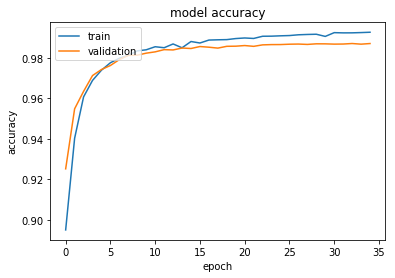

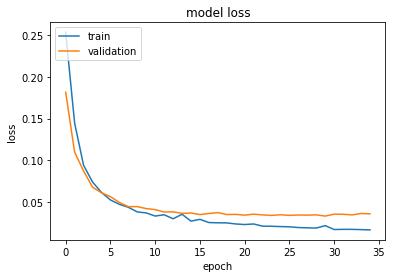

array to image


In [38]:
#Defining the U-Net model

#class myUnet(object):

img_rows = 256
img_cols = 256
smooth = 1


'''def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return (1-dice_coef(y_true, y_pred))'''
        
def get_unet():

        #inputs = Input((self.img_rows, self.img_cols,3))
        inputs = Input((img_rows, img_cols, 1))
        
        conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
        print("conv1 shape:",conv1.shape)
        conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
        #print( "conv1 shape:",conv1.shape)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        print("pool1 shape:",pool1.shape)
        
        conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
        print( "conv2 shape:",conv2.shape)
        conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
       # print( "conv2 shape:",conv2.shape)
        #drop2 = Dropout(0.5)(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
        print( "pool2 shape:",pool2.shape)
        
        conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
        print("conv3 shape:",conv3.shape)
        conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
        #print("conv3 shape:",conv3.shape)
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
        #print("pool3 shape:",pool3.shape)
        #drop3 = Dropout(0.5)(conv3)
        
        conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
        print("conv3 shape:",conv3.shape)
        conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
        #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
        
        up5 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv4))
        merge5 = merge([conv3,up5], mode = 'concat', concat_axis = 3)
        conv5 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge5)
        #drop4 = Dropout(0.1)(conv4)
        conv5 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
        
        up6 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
        merge6 = merge([conv2,up6], mode = 'concat', concat_axis = 3)
        conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
        #drop5 = Dropout(0.1)(conv5)
        conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
        
        up7 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
        merge7 = merge([conv1,up7], mode = 'concat', concat_axis = 3)
        conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
        #drop5 = Dropout(0.1)(conv5)
        conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
      
        conv8 = Conv2D(1, (1, 1), activation='sigmoid')(conv7)
        
        model = Model(input = inputs, output = conv8)

        #model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
                
        optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0)
        #model.compile(optimizer = optimizer, loss = dice_coef_loss, metrics=[dice_coef])
        model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['binary_accuracy'])

        return model
    
'''def resize_arr(imgs):
        imgsp = np.ndarray((1,imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
        for i in range(imgs.shape[0]):
            imgsp[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)
        #imgsp = imgsp[..., np.newaxis]
        imgsp = np.expand_dims(imgsp, axis=1)
        return imgsp'''
    
def resize_arr(imgs):
        imgsp = imgs.reshape((imgs.shape[0], img_cols, img_rows, 1))
        return imgsp
    
def train():

        #print("loading data")
        #imgs_train, imgs_mask_train, imgs_test = self.load_data()
        #print("loading data done")
        Train_data_image2 = resize_arr(Train_data_image)
        Train_data_mask2 = resize_arr(Train_data_mask)
        
        Train_data_image2 = Train_data_image2.astype('float32')
        mean = np.mean(Train_data_image2)  # mean for data centering
        std = np.std(Train_data_image2)  # std for data normalization

        Train_data_image2 -= mean
        Train_data_image2 /= std
        print("******* Train_data_image2 ********")
        print(Train_data_image2)
        print(Train_data_image2.shape)

        Train_data_mask2  = Train_data_mask2.astype('float32')
        Train_data_mask2  /= 255. # scale masks to [0, 1]
        print("******* Train_data_mask2 ********")
        print(Train_data_mask2)
        print(Train_data_mask2.shape)
        
        #np.reshape(a, (2, 3)) 
        #np.reshape(Train_data_image[0][0], (512, 512, 3)) 
            
        model = get_unet()
        print("got unet")
        model.summary()

        model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss',verbose=1, save_best_only=True)
        print('Fitting model...')
        history = model.fit(Train_data_image2, Train_data_mask2, batch_size=1, nb_epoch=35, verbose=2, validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])
        
        #model.load_weights('unet.hdf5')
        
        Test_data_image2 = resize_arr(Test_data_image)
            
        Test_data_image2 =  Test_data_image2.astype('float32')
        Test_data_image2 -= mean
        Test_data_image2 /= std 
        
        #Test_data_mask2 = resize_arr(Test_data_mask)
            
        #Test_data_mask2  = Test_data_mask2.astype('float32')
        #Test_data_mask2  /= 255.
        
        print('predict test data')
        Test_data_mask_predict = model.predict(Test_data_image2, batch_size=1, verbose=1)
        #print(Test_data_mask_predict)
        #Test_data_mask_predict[Test_data_mask_predict>0.5]=1
        #Test_data_mask_predict[Test_data_mask_predict<=0.5]=0
        #print(Test_data_mask_predict)
        np.save('/home/hp/data/Test_data_mask_predict.npy', Test_data_mask_predict)
        segmented_img = np.load('/home/hp/data/Test_data_mask_predict.npy')
        print("***** segmented_img before thresholding *****")
        print(segmented_img)
        print('-'*60)
        segmented_img[segmented_img>0.5] = 1
        segmented_img[segmented_img<=0.5] = 0
        print("***** segmented_img after thresholding *****")
        print(segmented_img)
        np.save('/home/hp/data/segmented_img.npy', segmented_img)
       
        # list all data in history
        print(history.history.keys())
        # summarize history for accuracy
        plt.plot(history.history['binary_accuracy'])
        plt.plot(history.history['val_binary_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show() 
        
        
        # summarize history for accuracy
        '''plt.plot(history.history['dice_coef'])
        plt.plot(history.history['val_dice_coef'])
        plt.title('model accuracy')
        plt.ylabel('segmentation accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show() ''' 
        
def save_img():

        print("array to image")
        imgs = np.load('/home/hp/data/segmented_img.npy')
        for i in range(imgs.shape[0]):
            img = imgs[i]
            img = array_to_img(img)
            img.save("/home/hp/data/Result/%d.png"%(i+1))
            
#if __name__ == '__main__':
#myunet = myUnet()
#Train_data_image = myunet.resizei(Train_data_image)
#Train_data_mask = myunet.resizei(Train_data_mask)
#Test_data_image = myunet.resizei(Test_data_image)

train()
save_img()            



In [39]:
def dice_coef(seg, gt):
    if seg.shape != gt.shape:
        raise ValueError("Shape mismatch: seg and gt must have to be of the same shape.")
    else:
        intersection = np.logical_and(seg, gt)
        value = (2. * intersection.sum())  / (seg.sum() + gt.sum())
    return value

path = '/home/hp/data/Result/'
path2 = '/home/hp/data/Test/label1/'
list = os.listdir('/home/hp/data/Test/label1/') # dir is your directory path
size = len(list)
print (size)

accuracy = []

for j in range(1,size+1): 
    seg=mpimg.imread(path+str(j)+'.png')
    print("printing segmented_img")
    print(seg)
    seg = np.asarray(seg).astype(np.bool)
    print(seg)
    print('-'*80)
    print("printing test labels")
    gt=mpimg.imread(path2+str(j)+'.png')
    print(gt)
    gt = np.asarray(gt).astype(np.bool)
    print(gt)
    print('%'*80)
    value = dice_coef(seg, gt)
    accuracy.append(value)  
    
#print(accuracy)
accu = np.array(accuracy) 
print(accu)
print(accu.mean())

8
printing segmented_img
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ... False  True  True]
 [False False False ... False  True  True]]
--------------------------------------------------------------------------------
printing test labels
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [12]:
#converting jpg to png

path = '/home/hp/data/Result/'
list = os.listdir('/home/hp/data/Result/') # dir is your directory path
size = len(list)
print (size)

for j in range(1,size+1): 
   im = Image.open(path+str(j)+'.jpg')
   im.save(path+str(j)+'.png')

9
